# Evaluate Camel

In [17]:
import os
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, facet_wrap
from config import Config
import pandas as pd
from projects import ProjectName

projects = list(map(lambda x: x.github(), list(ProjectName)))
working_projects = dict()
for project in projects:
    try:
        designite_scores_path = Config.get_work_dir_path(os.path.join("paper", "scores", "designite", project, "scores.csv"))
        designite_camel_df = pd.read_csv(designite_scores_path)
        designite_camel_df['dataset'] = 'Designite'

        fowler_scores_path = Config.get_work_dir_path(os.path.join("paper", "scores", "fowler", project, "scores.csv"))
        fowler_camel_df = pd.read_csv(fowler_scores_path)
        fowler_camel_df['dataset'] = 'Fowler'

        traditional_scores_path = Config.get_work_dir_path(os.path.join("paper", "scores", "traditional", project, "scores.csv"))
        traditional_scores_df = pd.read_csv(traditional_scores_path)
        traditional_scores_df['dataset'] = 'Traditional'

        traditional_fowler_scores_path = Config.get_work_dir_path(os.path.join("paper", "scores", "traditional_folwer", project, "scores.csv"))
        traditional_fowler_scores_df  = pd.read_csv(traditional_fowler_scores_path)
        traditional_fowler_scores_df['dataset'] = 'Traditional +\n Fowler'

        traditional_designite_scores_path = Config.get_work_dir_path(os.path.join("paper", "scores", "traditional_designite", project, "scores.csv"))
        traditional_designite_scores_df = pd.read_csv(traditional_designite_scores_path)
        traditional_designite_scores_df['dataset'] = 'Traditional +\n Designite'

        designite_fowler_scores_path = Config.get_work_dir_path(os.path.join("paper", "scores", "designite_fowler", project, "scores.csv"))
        designite_fowler_scores_df = pd.read_csv(designite_fowler_scores_path )
        designite_fowler_scores_df['dataset'] = 'Designite +\n Fowler'

        traditional_designite_fowler_path = Config.get_work_dir_path(os.path.join("paper", "scores", "traditional_designite_fowler", project, "scores.csv"))
        traditional_designite_fowler_df  = pd.read_csv(traditional_designite_fowler_path)
        traditional_designite_fowler_df['dataset'] = 'Traditional +\n Designite +\n Fowler'

        datasets = [
            designite_camel_df,
            fowler_camel_df,
            traditional_scores_df,
            traditional_fowler_scores_df,
            traditional_designite_scores_df,
            designite_fowler_scores_df,
            traditional_designite_fowler_df
        ]

        scores_df = pd.concat(datasets, ignore_index=True)
        working_projects[project] = scores_df
    except Exception:
        continue

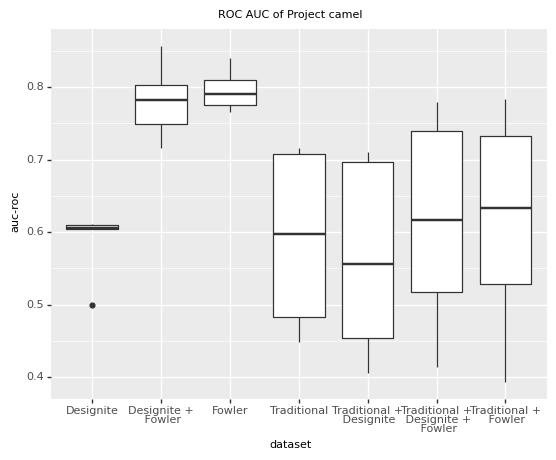

<ggplot: (317246216)>
                        estimator          configuration  precision    recall  \
0   QuadraticDiscriminantAnalysis                     {}   0.048343  1.000000   
1            SupportVectorMachine             {'C': 0.1}   0.097179  0.406114   
2      LinearDiscriminantAnalysis                     {}   0.107831  0.366812   
3            SupportVectorMachine             {'C': 100}   0.108614  0.379913   
4                    RandomForest  {'n_estimators': 100}   0.096912  0.397380   
..                            ...                    ...        ...       ...   
65              K-NearestNeighbor                     {}   0.150313  0.685714   
66     LinearDiscriminantAnalysis                     {}   0.233146  0.790476   
67             LogisticRegression             {'C': 1.0}   0.215517  0.714286   
68             LogisticRegression         {'C': 10000.0}   0.213450  0.695238   
69           SupportVectorMachine             {'C': 0.1}   0.200000  0.847619   

    f

In [18]:
# for project in working_projects.keys():
#     scores_df = working_projects[project]
project = list(working_projects.keys())[0]
scores_df = working_projects[project]
g = (ggplot(data=scores_df,
            mapping=aes(x='dataset',
                        y='auc-roc'))
        + geom_boxplot()
        + labs(title="ROC AUC of Project {0}".format(project))
        + theme(text=element_text(size=8))
     )
print(g)
print(scores_df)

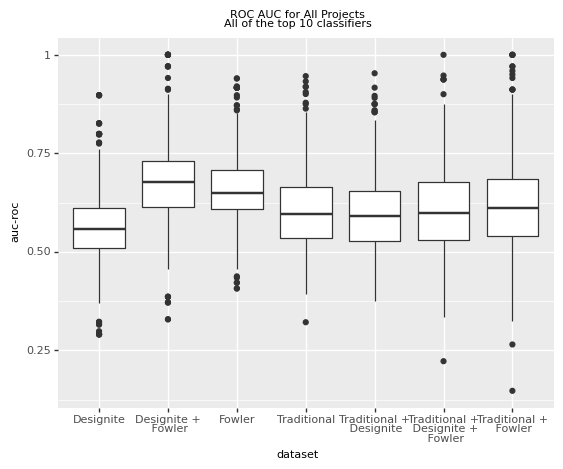

<ggplot: (-9223372036537942191)>


In [19]:
scores = pd.concat(list(working_projects.values()), ignore_index=True)
g = (ggplot(data=scores,
            mapping=aes(x='dataset',
                        y='auc-roc'))
     + geom_boxplot()
     + labs(title="ROC AUC for All Projects\nAll of the top 10 classifiers")
     + theme(text=element_text(size=8)))
print(g)

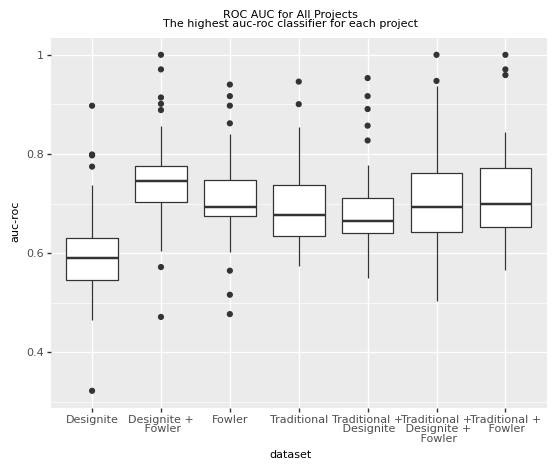

<ggplot: (-9223372036539135740)>


In [20]:
auc_scores = pd.concat(list(map(lambda x:
                                x.drop(['estimator', 'configuration'], axis=1)
                                 .groupby('dataset')
                                 .aggregate({'auc-roc': 'max'})
                                 .reset_index(), working_projects.values())))

g = (ggplot(data=auc_scores,
            mapping=aes(x='dataset',
                        y='auc-roc'))
     + geom_boxplot()
     + labs(title="ROC AUC for All Projects\nThe highest auc-roc classifier for each project")
     + theme(text=element_text(size=8)))
print(g)

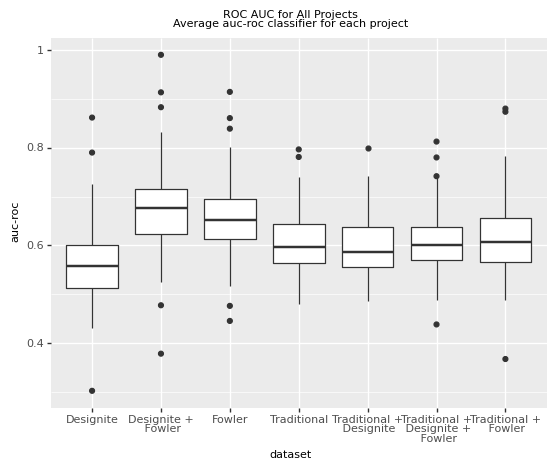

<ggplot: (316970616)>


In [21]:
auc_scores = pd.concat(list(map(lambda x:
                                x.drop(['estimator', 'configuration'], axis=1)
                                 .groupby('dataset')
                                 .aggregate({'auc-roc': 'mean'})
                                 .reset_index(), working_projects.values())))

g = (ggplot(data=auc_scores,
            mapping=aes(x='dataset',
                        y='auc-roc'))
     + geom_boxplot()
     + labs(title="ROC AUC for All Projects\nAverage auc-roc classifier for each project")
     + theme(text=element_text(size=8)))
print(g)